**IMAGE CLASSIFICATION USING CIFAR-10 DATASET: APPLYING K-NEAREST NEIGHBORS CLASSIFIER USING EUCLIDEAN (L2) DISTANCE WITH 5-FOLD CROSS-VALIDATION**

In this assignment, we will explore the CIFAR-10 dataset, which consists of 60,000 32x32x3 color images in 10 different classes. The objective is to build a model for image classification by applying Euclidean (L2) distances and using 5-fold cross-validation to find an optimal value of k. The training data consists of 50,000 images, and testing data consists of 10,000 images. We will use a subset of the training and testing data to perform classfication due to memory limitations. We will plot a graph to visualize the accuracy of different hyperparameter values (K) and obtain accuracy on testing data using the optimal k value. for this particular dataset. You will write your code for this assignment in the ‘KNN_assignment.py’ in the parts of the script where you are instructed to implement code. You will also provide a report (in pdf or word doc format)  of the results obtained in the assignment.

**Dataset:**

The CIFAR-10 dataset can be downloaded from the following link: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz. Code is provided to download and extract the dataset in your current directory in the following path: ./data/cifar-10-batches.py. Run the code to obtain the dataset or manually obtain it in the path given. Code provided will also extract training and testing data from the dataset.

**Model Building and Evaluation:**

To classify the gray-scale CIFAR-10 images, we will employ the k-nearest neighbors (k-NN) algorithm. This algorithm classifies an image by considering the class labels of its k nearest neighbors. We will use the Euclidean (L2) distance metric, to measure the similarity between images. You will need to implement code to apply the following and include comments to explain your code:

Preprocess the data and implement methods to compute Euclidean distances and predict labels of testing data. You will obtain model  accuracy on test data using k=5. Then, you will evaluate the performance of model on a set of k values using 5-fold cross-validation. The training dataset will be divided into 5 subsets (folds), and for each value of k, the model will be trained and evaluated 5 times using different combinations of training and validation data. This approach allows us to assess the model's performance across multiple folds, providing a more robust evaluation. You will then use the best value of k from your evaluation to obtain model accuracy on testing data.

**Results and Analysis:**

For each fold of cross validation, you will record the accuracy achieved by the model for each value of K. You will compute the average accuracy across all folds for each value of K and plot a visualization of the accuracies obtained using cross validation.

Provide all results from running the model in your report, including those mentioned above, specifying what the results are. In your report, Discuss why you performed cross validation to find k, including how an optimal value of k led to better fitting of the model. Also discuss how the performance of this classifier would compare to a more sophisticated model, such as a Neural Network (NN) or Convolutional-NN on the CIFAR-10 dataset.

**Bonus:**

To obtain bonus points, obtain the results mentioned above using Manhattan (L1) distance as the distance metric of your classifier and compare model
performance using Manhattan distance to that using Euclidean distance.

**Submission:**

Modify only the ‘KNN_assignment.py’ script in the assignment folder and upload your completed code, results and report without the  downloaded data (this would take too much space) in the same folder in zip format to the provided submission link. My solutions required 27 lines of code.


In [1]:
# Importing TensorFlow library
import tensorflow as tf

# Importing specific modules from TensorFlow.keras for building neural networks
from tensorflow.keras import datasets, layers, models

# Importing matplotlib.pyplot for plotting
import matplotlib.pyplot as plt

# Importing numpy for numerical operations
import numpy as np

In [2]:
# Loading CIFAR-10 dataset using datasets module from TensorFlow.keras
(train_X, train_y), (test_X, test_y) = datasets.cifar10.load_data()

# Printing the shape of the training data
print("Shape of training data:", train_X.shape)

170498071/170498071 [==============================] - 12s 0us/step
Shape of training data: (50000, 32, 32, 3)


In [3]:
# Outputting the dimensions of the training data
print('Dimensions of training data:', train_X.shape)

# Displaying the dimensions of the training labels
print('Dimensions of training labels:', train_y.shape)

# Outputting the dimensions of the test data
print('Dimensions of test data:', test_X.shape)

# Outputting the dimensions of the test labels
print('Dimensions of test labels:', test_y.shape)

Dimensions of training data: (50000, 32, 32, 3)
Dimensions of training labels: (50000, 1)
Dimensions of test data: (10000, 32, 32, 3)
Dimensions of test labels: (10000, 1)


In [4]:
# Adjusting the default figure size to 13x9 inches
plt.rcParams['figure.figsize'] = (13.0, 9.0)

# Setting the interpolation method to 'nearest' for image display
plt.rcParams['image.interpolation'] = 'nearest'

# Configuring the default colormap to a darker gray
plt.rcParams['image.cmap'] = 'Greys'

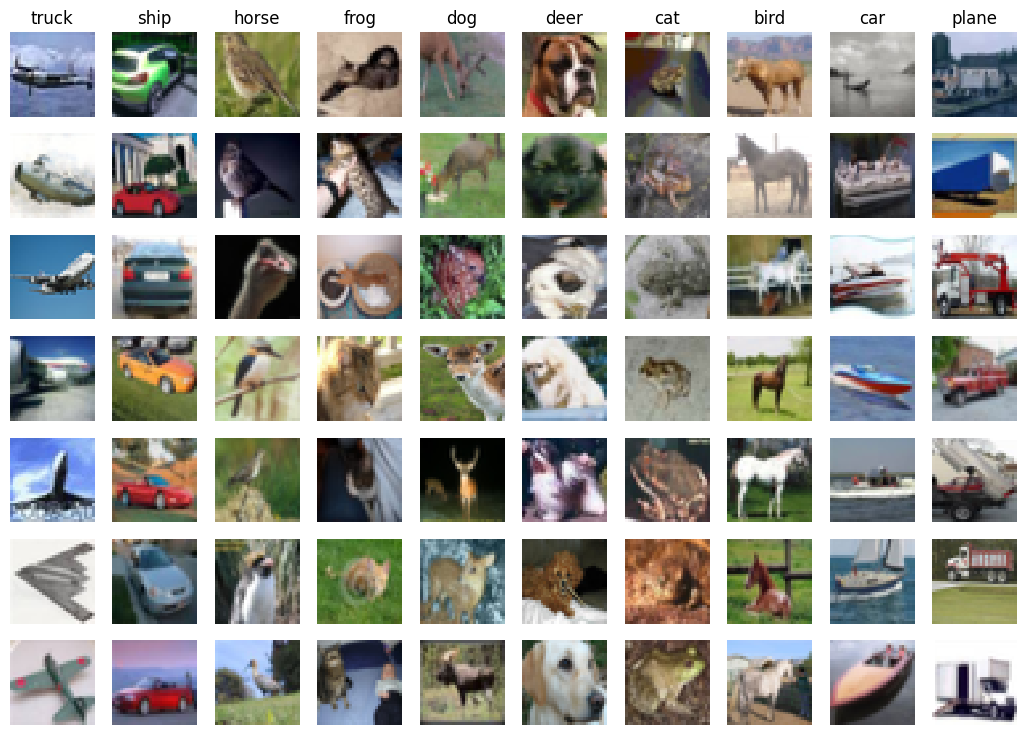

In [5]:
# Define the classes of objects in the CIFAR-10 dataset in inverse order
categories = ['truck', 'ship', 'horse', 'frog', 'dog', 'deer', 'cat', 'bird', 'car', 'plane']

# Determine the total number of categories
num_categories = len(categories)

# Set the number of images to display per category
images_per_category = 7

# Iterate over each category
for category_index, category_name in enumerate(categories):
    # Obtain the indices of images in the training dataset that belong to the current category
    category_indices = np.flatnonzero(train_y == category_index)

    # Randomly select a subset of images_per_category indices without replacement
    selected_indices = np.random.choice(category_indices, images_per_category, replace=False)

    # Iterate over each selected index
    for image_index, index in enumerate(selected_indices):
        # Calculate the index for the subplot
        subplot_index = image_index * num_categories + category_index + 1

        # Create a subplot
        plt.subplot(images_per_category, num_categories, subplot_index)

        # Display the image corresponding to the current index
        plt.imshow(train_X[index].astype('uint8'))

        # Turn off axis labels
        plt.axis('off')

        # Add title to the subplot (only for the first image in each category)
        if image_index == 0:
            plt.title(category_name)

# Display the plot with all the subplots
plt.show()

In [6]:
# Specify the number of training samples
number_of_training_samples = 10000

# Create a mask to select the specified number of training samples
training_mask = list(range(number_of_training_samples))

# Apply the mask to select the training samples
train_X = train_X[training_mask]
train_y = train_y[training_mask]

# Define the number of test samples
number_of_test_samples = 1000

# Create a mask to select the specified number of test samples
test_mask = list(range(number_of_test_samples))

# Apply the mask to select the test samples
test_X = test_X[test_mask]
test_y = test_y[test_mask]

# Reshape the training and test image data into row vectors
train_X = np.reshape(train_X, (train_X.shape[0], -1))
test_X = np.reshape(test_X, (test_X.shape[0], -1))

# Display the dimensions of the training data
print('Training data dimensions:', train_X.shape)

# Display the dimensions of the test data
print('Test data dimensions:', test_X.shape)

Training data dimensions: (10000, 3072)
Test data dimensions: (1000, 3072)


In [7]:
# Importing the KNeighborsClassifier module from sklearn's neighbors library
from sklearn.neighbors import KNeighborsClassifier

# Initializing a KNN classifier with 10 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=10)

# Fitting the KNN classifier to the training data
knn_classifier.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [8]:
# Compute the distances and indices of the nearest neighbors for the test data
distances, indices = knn_classifier.kneighbors(test_X)

# Print the shape of the distances array
print('Shape of distances array:', distances.shape)

Shape of distances array: (1000, 10)


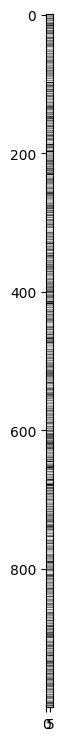

In [9]:
# Displaying the distances matrix as an image with nearest neighbor interpolation
plt.imshow(distances, interpolation='nearest')

# Displaying the plot
plt.show()

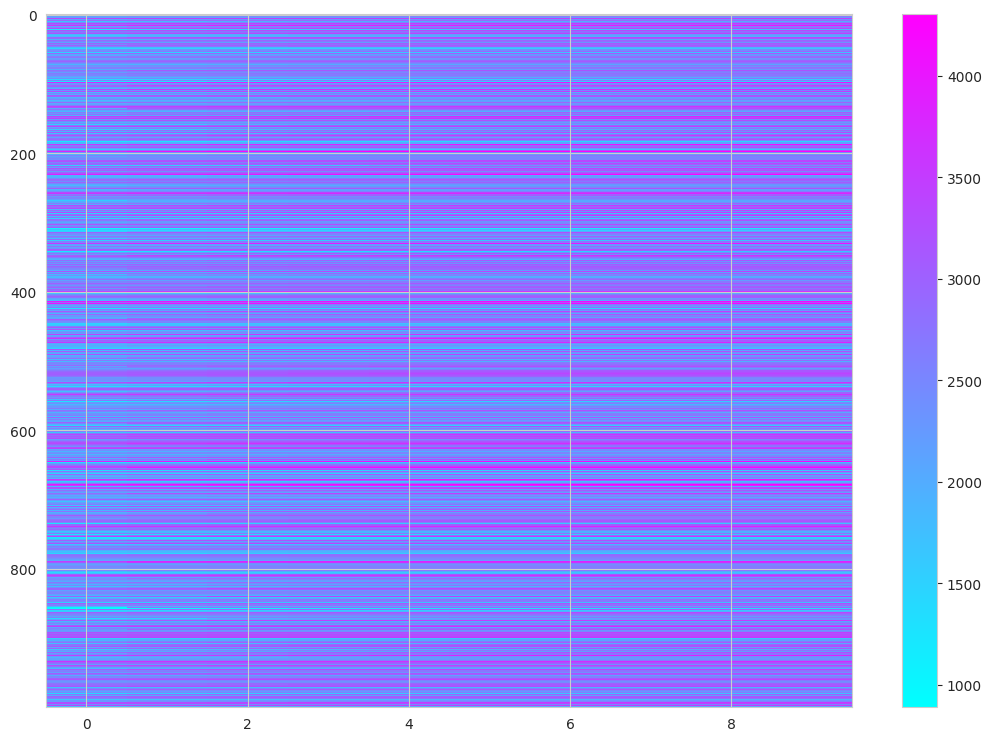

In [10]:
# Importing the seaborn library for visualization
import seaborn

# Setting the seaborn style
seaborn.set_style('whitegrid')

# Displaying the distances matrix as an image with automatic aspect ratio and cool colormap
plt.imshow(distances, aspect='auto', cmap='cool')

# Adding a color bar to the plot
plt.colorbar()

# Displaying the plot
plt.show()

In [11]:
# Compute the accuracy of the KNN classifier on the test data
accuracy_3 = knn_classifier.score(test_X, test_y)

# Print the accuracy percentage
print('Accuracy_3: {:.2f} \nOr,'.format(accuracy_3 * 100))
print('Accuracy_3:', round(accuracy_3 * 100))

Accuracy_3: 28.80 
Or,
Accuracy_3: 29


In [12]:
# Initializing a KNN classifier with 5 neighbors
knn_classifier_ = KNeighborsClassifier(n_neighbors=5)

# Training the classifier using the training data
knn_classifier_.fit(train_X, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [13]:
# Compute the accuracy of the classifier on the test data
accuracy_1 = knn_classifier_.score(test_X, test_y)

# Print the accuracy percentage
print('Accuracy_1: {:.2f} \nOr,'.format(accuracy_1 * 100))
print('Accuracy_1:', round(accuracy_1 * 100))

Accuracy_1: 29.60 
Or,
Accuracy_1: 30


In [14]:
# Defining KNN classifiers with varying numbers of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=10)
knn_classifier_ = KNeighborsClassifier(n_neighbors=5)
knn_classification = KNeighborsClassifier(n_neighbors=1)

# Fit the classification model with 1 neighbor to the training data
knn_classification.fit(train_X, train_y)

# Compute the accuracy of each classifier on the test data
accuracy_2 = knn_classification.score(test_X, test_y)

# Print the accuracies as percentages
print('Accuracy_1:', round(accuracy_1 * 100))
print('Accuracy_2: {:.2f} \nOr,'.format(accuracy_2 * 100))
print('Accuracy_2:', round(accuracy_2 * 100))
print('Accuracy_3:', round(accuracy_3 * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy_1: 30
Accuracy_2: 28.30 
Or,
Accuracy_2: 28
Accuracy_3: 29


In [15]:
# Importing the accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

# Define the list of specific values of k
specific_values_of_k = [1, 3, 5, 8, 10]

# Loop through the specific values of k
for k in specific_values_of_k:
    # Create a KNN classifier with k neighbors and 'minkowski' metric
    knn_classif = KNeighborsClassifier(n_neighbors=k, metric='minkowski')

    # Fit the classifier to the training data
    knn_classif.fit(train_X, train_y)

    # Predict the labels for the test data
    y_prediction = knn_classif.predict(test_X)

    # Compute the accuracy score
    acc_score = accuracy_score(test_y, y_prediction)

    # Print the accuracy for the current value of k
    print('Accuracy for k={0}: {1:.2f}%'.format(k, acc_score * 100))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=1: 28.30%


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=3: 28.00%


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=5: 29.60%


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=8: 27.60%


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy for k=10: 28.80%


In [16]:
# Importing the required functions from the sklearn.metrics module
from sklearn.metrics import confusion_matrix, accuracy_score

# Compute the accuracy of the KNN classifier
knn_accuracy = accuracy_score(y_prediction, test_y)

# Compute the confusion matrix for the KNN classifier
knn_confusion = confusion_matrix(y_prediction, test_y)

# Print the accuracy score
print('Score of Accuracy:', knn_accuracy)

# Print the confusion matrix
print('Matrix of Confusion:\n', knn_confusion)

Score of Accuracy: 0.288
Matrix of Confusion:
 [[45 10 16  6  9  5  2  8 12 16]
 [ 0  9  0  1  0  0  0  0  1  0]
 [14 11 42 33 25 24 36 25  6 12]
 [ 2  4  4 17  2  7  1  3  1  5]
 [ 8 22 29 20 36 22 36 31  7 17]
 [ 0  1  1  6  2 10  3  2  2  1]
 [ 3  9  5 16  8 11 28  7  1  8]
 [ 1  0  0  0  3  1  2 16  0  1]
 [29 21  3  3  5  6  4  9 76 40]
 [ 1  2  0  1  0  0  0  1  0  9]]


In [17]:
# Importing the accuracy_score function from the metrics module of the sklearn library
from sklearn.metrics import accuracy_score

# Defining the number of folds for cross-validation
number_folds = 5

# Specifying the choices of k for KNN
k_choices = [1, 3, 5, 7, 8, 10, 12, 15, 20, 50, 100]

# Splitting the training data into folds
train_X_folds = []
train_y_folds = []
train_y_reshaped = train_y.reshape(-1, 1)
train_X_folds, train_y_folds = np.array_split(train_X, 10), np.array_split(train_y_reshaped, 10)

# Dictionary to store accuracies for different k values
k_to_accuracies = {}

# Iterating over each choice of k
for k_ in k_choices:
    k_to_accuracies[k_] = []

# Performing k-fold cross-validation
for i in range(number_folds):
    # Creating a KNN classifier for each fold
    classifier_fold = KNeighborsClassifier()

    # Combining training data from other folds for validation
    X_validation_train = np.vstack(train_X_folds[0:i] + train_X_folds[i+1:])
    y_validation_train = np.vstack(train_y_folds[0:i] + train_y_folds[i+1:])
    y_validation_train = y_validation_train[:, 0]

    # Fitting the classifier to the training data
    classifier_fold.fit(X_validation_train, y_validation_train)

    # Evaluating the classifier on the current fold
    for k_ in k_choices:
        # Predicting probabilities for validation data
        y_validation_prediction = classifier_fold.predict_proba(train_X_folds[i])

        # Computing accuracy for the current fold and k
        number_correct = np.sum(y_validation_prediction == train_y_folds[i])
        accuracy = float(number_correct) / len(y_validation_prediction)

        # Storing the accuracy for the current fold and k
        k_to_accuracies[k_].append(accuracy)

In [18]:
# Iterate over each key (k value) in the sorted k_to_accuracies dictionary
for k_value in sorted(k_to_accuracies):
    # Iterate over each accuracy value corresponding to the current k value
    for accuracy_value in k_to_accuracies[k_value]:
        # Print the k value and accuracy in percentage format
        print('For k={}, accuracy={:.2f}%'.format(k_value, round(accuracy_value * 100, 2)))

For k=1, accuracy=74.30%
For k=1, accuracy=73.70%
For k=1, accuracy=70.60%
For k=1, accuracy=70.50%
For k=1, accuracy=78.00%
For k=3, accuracy=74.30%
For k=3, accuracy=73.70%
For k=3, accuracy=70.60%
For k=3, accuracy=70.50%
For k=3, accuracy=78.00%
For k=5, accuracy=74.30%
For k=5, accuracy=73.70%
For k=5, accuracy=70.60%
For k=5, accuracy=70.50%
For k=5, accuracy=78.00%
For k=7, accuracy=74.30%
For k=7, accuracy=73.70%
For k=7, accuracy=70.60%
For k=7, accuracy=70.50%
For k=7, accuracy=78.00%
For k=8, accuracy=74.30%
For k=8, accuracy=73.70%
For k=8, accuracy=70.60%
For k=8, accuracy=70.50%
For k=8, accuracy=78.00%
For k=10, accuracy=74.30%
For k=10, accuracy=73.70%
For k=10, accuracy=70.60%
For k=10, accuracy=70.50%
For k=10, accuracy=78.00%
For k=12, accuracy=74.30%
For k=12, accuracy=73.70%
For k=12, accuracy=70.60%
For k=12, accuracy=70.50%
For k=12, accuracy=78.00%
For k=15, accuracy=74.30%
For k=15, accuracy=73.70%
For k=15, accuracy=70.60%
For k=15, accuracy=70.50%
For k=15, a

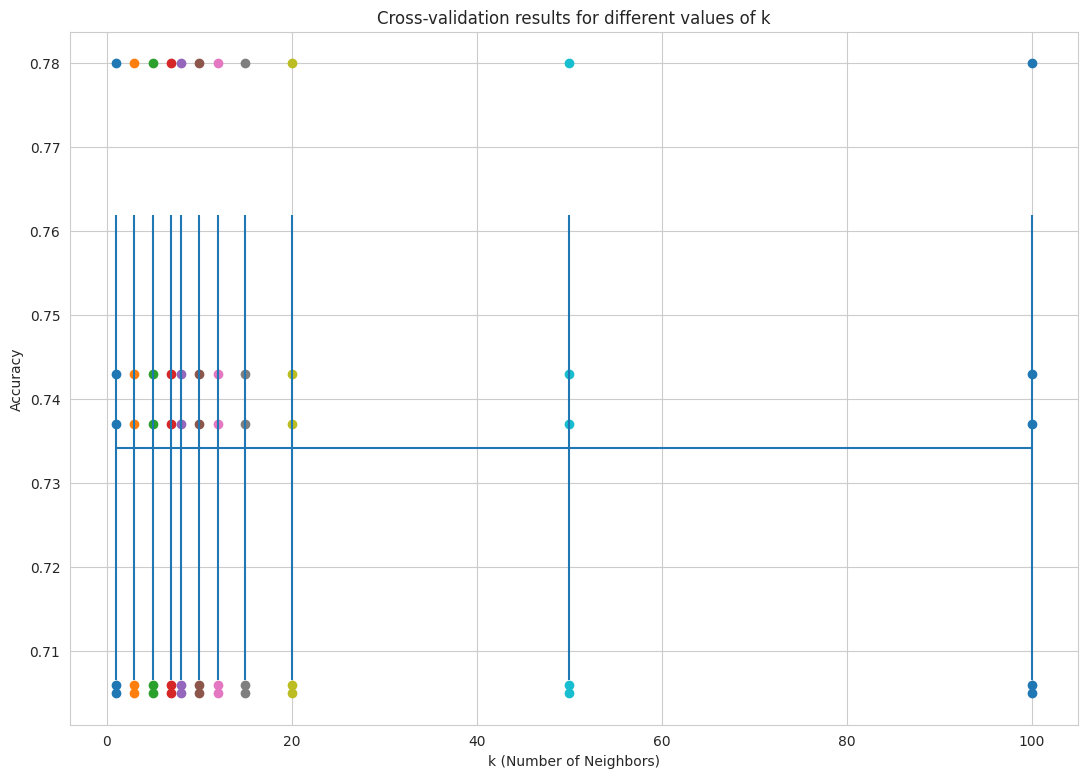

In [19]:
# Iterate over each choice of k
for k_value in k_choices:
    # Get the list of accuracies corresponding to the current k value
    accuracies = k_to_accuracies[k_value]

    # Plot a scatter plot of k vs. accuracies
    plt.scatter([k_value] * len(accuracies), accuracies)

# Compute the mean and standard deviation of accuracies for each k value
accuracies_mean = np.array([np.mean(v) for k, v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k, v in sorted(k_to_accuracies.items())])

# Plot the mean accuracies with error bars representing the standard deviation
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)

# Set the title to 'Cross-validation on k'
plt.title('Cross-validation results for different values of k')

# Label the x-axis as 'k'
plt.xlabel('k (Number of Neighbors)')

# Label the y-axis as 'Cross-validation accuracy'
plt.ylabel('Accuracy')

# Display the plot
plt.show()